In [17]:
#https://www.kaggle.com/code/alenabelova/insulin-free-diabetes-prediction-roc-auc-of-0-82

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
print(df.isnull().sum()) # check for misisng value

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [41]:
# Analyzing zero values - are they really zeros, or missing data in disguise?
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','Age']
zero_counts = (df[zero_features] == 0).sum()
print("Number of zeros in key features:")
print(zero_counts)
print("These zeros are likely not real values, but represent missing data. It's improbable to have a glucose level or blood pressure of zero.")

# Imputation with the median (a robust choice for potentially non-normally distributed data)
print("\nTime to deal with these zeros! We'll impute them with the median, a good strategy for handling outliers.")

Number of zeros in key features:
Glucose           0
BloodPressure     0
SkinThickness     0
Insulin           0
BMI              14
Age               0
dtype: int64
These zeros are likely not real values, but represent missing data. It's improbable to have a glucose level or blood pressure of zero.

Time to deal with these zeros! We'll impute them with the median, a good strategy for handling outliers.


In [33]:
cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0s with NaN, then impute NaN with median
df[cols_to_impute] = df[cols_to_impute].replace(0, np.nan).apply(lambda col: col.fillna(col.median()))

# Print median values for reference
medians = df[cols_to_impute].median()
print("\n🔹 Imputed NaN (originally 0) values with median for the 5 features:")
print(medians)



🔹 Imputed NaN (originally 0) values with median for the 5 features:
Glucose          117.0
BloodPressure     72.0
SkinThickness     29.0
Insulin          125.0
BMI               32.3
dtype: float64


In [43]:
# Check if there are any zeros left after imputation
zero_counts_after = (df[cols_to_impute] == 0).sum()
print("\nChecking if any zeros remain after imputation:")
print(zero_counts_after)


Checking if any zeros remain after imputation:
Glucose           0
BloodPressure     0
SkinThickness     0
Insulin           0
BMI              14
dtype: int64



📊 Skewness and Kurtosis Summary:
                 Feature  Skewness  Kurtosis
             Pregnancies  0.901674  0.150383
                 Glucose  0.535587 -0.263974
           BloodPressure  0.141885  1.083300
           SkinThickness  0.837608  5.387891
                 Insulin  3.380019 16.119165
                     BMI  0.599233  0.906439
DiabetesPedigreeFunction  1.919911  5.550792
                     Age  1.129597  0.631177


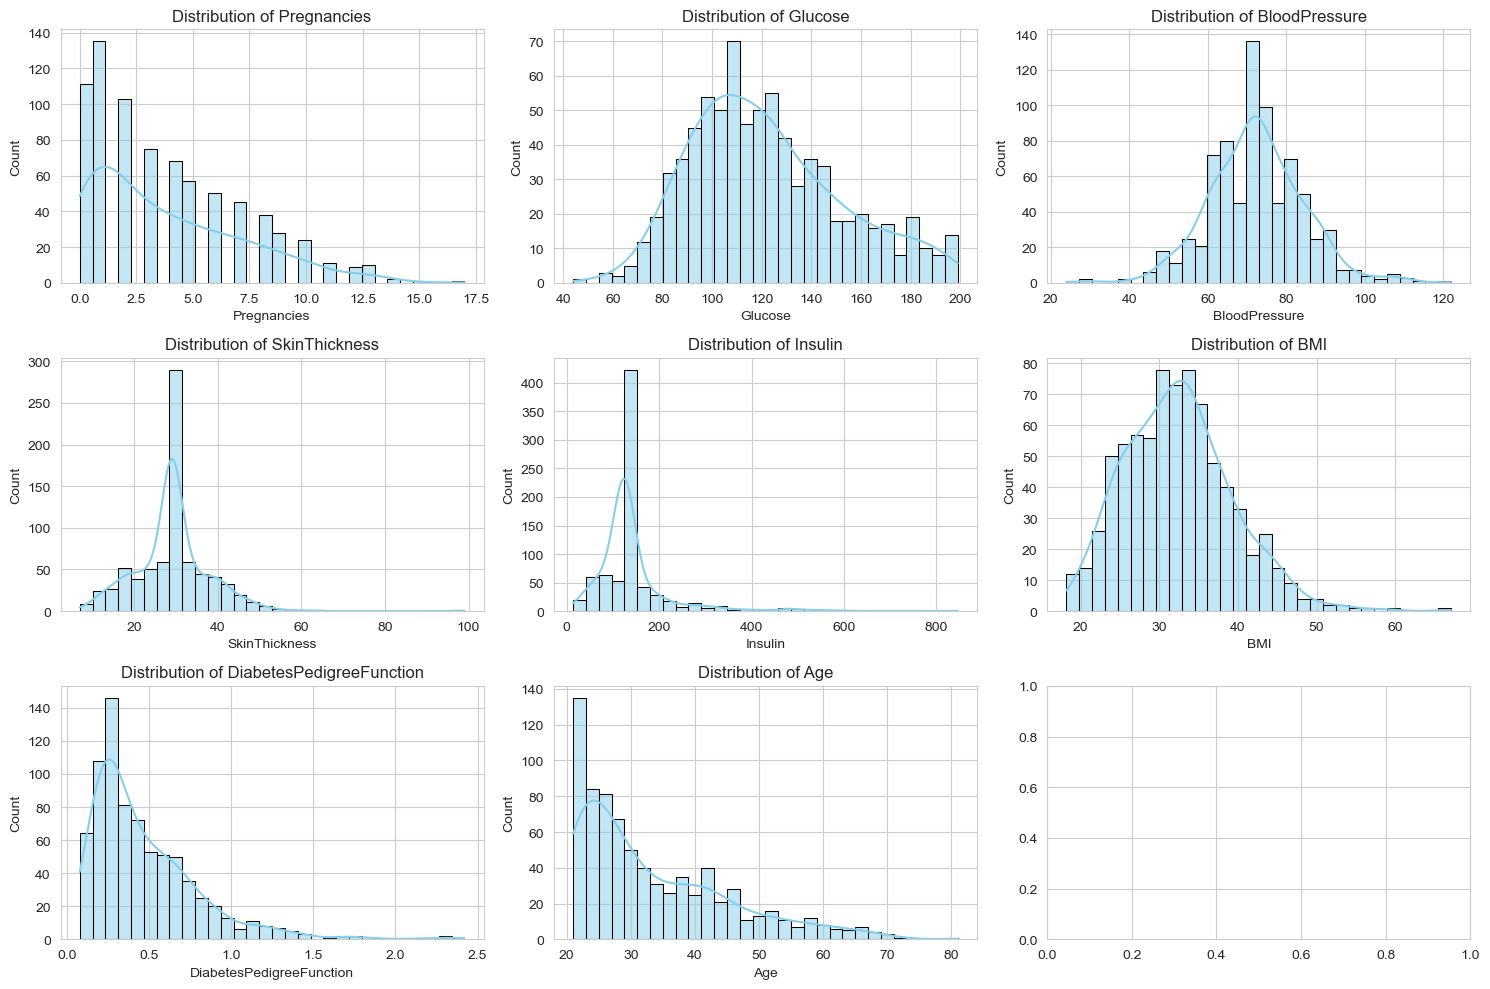

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis

# Calculate skewness and kurtosis for all features (excluding 'Outcome')
numerical_features = df.columns[:-1]  # Exclude 'Outcome'
stats_df = pd.DataFrame({
    "Feature": numerical_features,
    "Skewness": df[numerical_features].skew().values,
    "Kurtosis": df[numerical_features].apply(kurtosis).values
})

# Display statistics
print("\n📊 Skewness and Kurtosis Summary:")
print(stats_df.to_string(index=False))  # Removes default DataFrame index

# Enhanced Visualization of Distributions
sns.set_style('whitegrid')
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10), sharex=False, sharey=False)
axes = axes.flatten()  # Convert to 1D array for easy iteration

for i, col in enumerate(numerical_features):
    sns.histplot(df[col], kde=True, bins=30, color='skyblue', edgecolor="black", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()



📊 Outlier Summary (Before Handling):
               IQR Outliers  Z-Score Outliers
Glucose                   0                 0
BloodPressure            14                 8
SkinThickness            87                 4
Insulin                 346                20
BMI                       8                 5


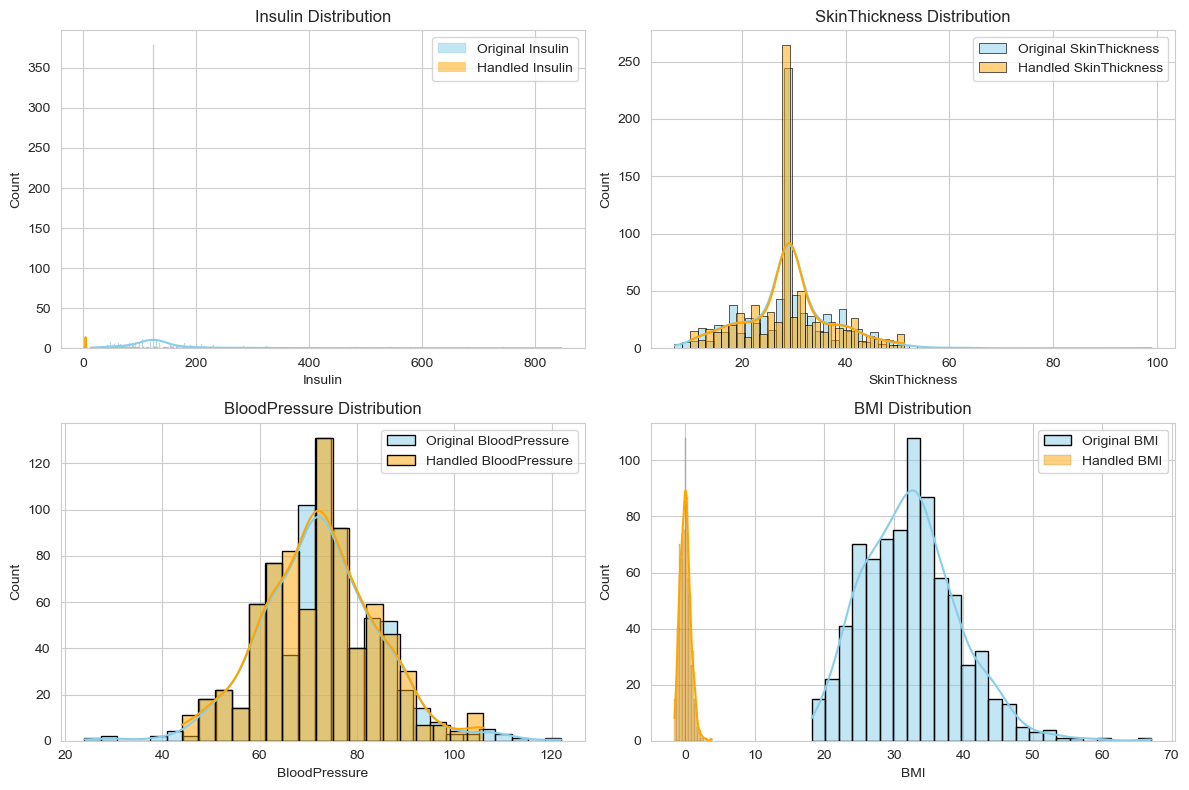


✅ DataFrame After Outlier Handling:
   Pregnancies  Glucose  DiabetesPedigreeFunction  Age  Outcome   Insulin  \
0            6    148.0                     0.627   50        1  4.836282   
1            1     85.0                     0.351   31        0  4.836282   
2            8    183.0                     0.672   32        1  4.836282   
3            1     89.0                     0.167   21        0  4.553877   
4            0    137.0                     2.288   33        1  5.129899   

   SkinThickness  BloodPressure       BMI  Glucose_handled  
0           35.0           72.0  0.142857            148.0  
1           29.0           66.0 -0.626374             85.0  
2           29.0           64.0 -0.989011            183.0  
3           23.0           66.0 -0.461538             89.0  
4           35.0           44.0  1.186813            137.0  


In [39]:
#dtecting outliers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, kurtosis, boxcox
from sklearn.preprocessing import RobustScaler

# Features with possible zero values (to be imputed)
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# --- Impute Zeros with Median ---
df[zero_features] = df[zero_features].replace(0, np.nan).apply(lambda col: col.fillna(col.median()))

# --- Outlier Detection (IQR & Z-Score) ---
def find_iqr_outliers(data):
    """Identify outliers using IQR method."""
    Q1, Q3 = data.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    return ((data < Q1 - 1.5 * IQR) | (data > Q3 + 1.5 * IQR)).sum()

# Compute outliers for each feature
iqr_outliers = df[zero_features].apply(find_iqr_outliers)
z_outliers = (df[zero_features].apply(zscore).abs() > 3).sum()

# Display structured outlier statistics
outlier_stats = pd.DataFrame({"IQR Outliers": iqr_outliers, "Z-Score Outliers": z_outliers})
print("\n📊 Outlier Summary (Before Handling):")
print(outlier_stats)

# --- Outlier Handling Methods ---
def handle_outliers(data, method='log', capping_percentiles=(0.01, 0.99)):
    """Apply specified outlier handling method."""
    if method == 'log':
        return np.log1p(data)  # log(1+x) prevents log(0) issues
    elif method == 'boxcox':
        transformed_data, _ = boxcox(data + 1)  # Box-Cox requires positive values
        return pd.Series(transformed_data, index=data.index)
    elif method == 'cap':
        lower, upper = data.quantile(capping_percentiles)
        return data.clip(lower=lower, upper=upper)
    elif method == 'scale':
        return pd.Series(RobustScaler().fit_transform(data.values.reshape(-1, 1)).flatten(), index=data.index)
    elif method == 'none':
        return data
    else:
        raise ValueError("Invalid outlier handling method.")

# --- Define Handling Strategies ---
outlier_config = {
    'Insulin': 'log',
    'SkinThickness': 'cap',
    'BloodPressure': 'cap',
    'BMI': 'scale',
    'Glucose': 'none'
}

# Apply outlier handling
for col, method in outlier_config.items():
    df[f'{col}_handled'] = handle_outliers(df[col], method=method)

# --- Visualization (Before vs After Outlier Handling) ---
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
plot_features = ['Insulin', 'SkinThickness', 'BloodPressure', 'BMI']

for i, col in enumerate(plot_features):
    ax = axes.flatten()[i]
    sns.histplot(df[col], kde=True, ax=ax, color='skyblue', label=f'Original {col}', edgecolor="black")
    sns.histplot(df[f'{col}_handled'], kde=True, ax=ax, color='orange', label=f'Handled {col}', edgecolor="black")
    ax.set_title(f"{col} Distribution")
    ax.legend()

plt.tight_layout()
plt.show()

# --- Cleanup: Remove Original Columns if Transformed ---
for col in zero_features:
    if outlier_config[col] != 'none':
        df.drop(columns=[col], inplace=True)
        df.rename(columns={f'{col}_handled': col}, inplace=True)

# Final Output
print("\n✅ DataFrame After Outlier Handling:")
print(df.head())



📊 Correlation Matrix (Processed Features):


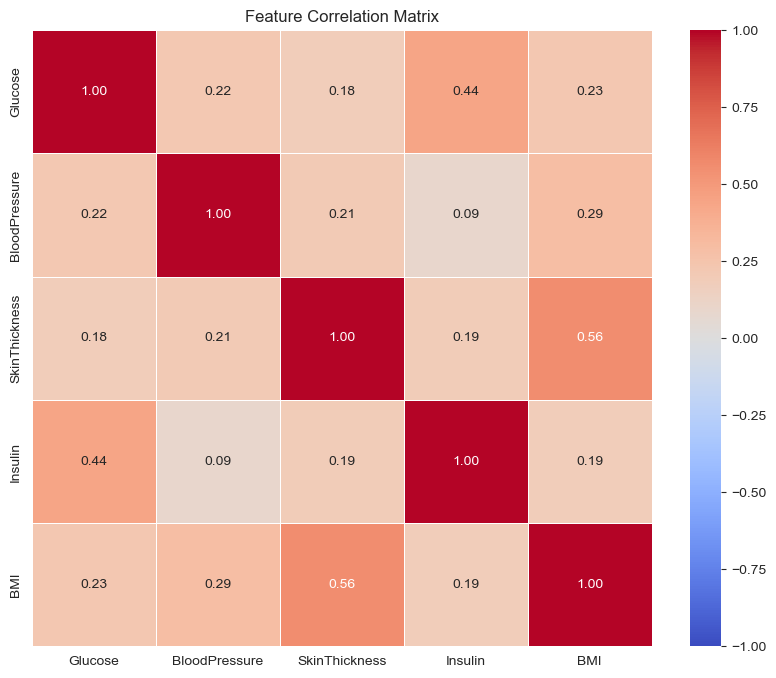


📌 Point-Biserial Correlation with Outcome:
      Feature  Point-Biserial r      p-value
      Glucose          0.492782 3.128719e-48
BloodPressure          0.169843 2.205648e-06
SkinThickness          0.215515 1.601139e-09
      Insulin          0.248705 2.724955e-12
          BMI          0.312038 8.336903e-19


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import pointbiserialr

# --- Heatmap of Correlation Matrix ---
sns.set_style("whitegrid")
print("\n📊 Correlation Matrix (Processed Features):")

plt.figure(figsize=(10, 8))
sns.heatmap(df[cols_to_impute].corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=.5)
plt.title("Feature Correlation Matrix")
plt.show()

# --- Compute Point-Biserial Correlation ---
print("\n📌 Point-Biserial Correlation with Outcome:")

pb_results = pd.DataFrame({
    "Feature": cols_to_impute,
    "Point-Biserial r": df[cols_to_impute].apply(lambda col: pointbiserialr(df['Outcome'], col)[0]),  # Extract r
    "p-value": df[cols_to_impute].apply(lambda col: pointbiserialr(df['Outcome'], col)[1])  # Extract p-value
})

# Print formatted results
print(pb_results.to_string(index=False))  # Removes default index for cleaner output


In [ ]:
#Point-Biserial Correlation

#The correlation coefficient (r) indicates the strength and direction of the association between the feature and the Outcome.
#A positive r means that higher values of the feature are associated with a higher probability of diabetes (Outcome = 1). 
#The p-value tells us the statistical significance of the correlation.
#A small p-value (typically less than 0.05) indicates that the observed.  
#Glucose. Shows the strongest positive correlation with the outcome (r = 0.493, p < 0.001). This confirms the well-known link between high glucose levels and diabetes.

#BMI. Exhibits a moderate positive correlation (r = 0.312, p < 0.001), indicating that higher BMI is associated with a higher likelihood of diabetes.

#Insulin, SkinThickness, BloodPressure. These features show weaker positive correlations but are still statistically significant, suggesting they contribute some information to predicting diabetes. correlation is unlikely to be due to chanc

In [51]:
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu

# --- Define Groups Based on Outcome ---
diabetic = df[df['Outcome'] == 1]
non_diabetic = df[df['Outcome'] == 0]

# --- Perform Welch's T-Test ---
def welch_ttest(feature):
    """Perform Welch's t-test (handles missing values automatically)."""
    try:
        return ttest_ind(diabetic[feature].dropna(), non_diabetic[feature].dropna(), 
                         equal_var=False, nan_policy='omit')
    except Exception as e:
        print(f"⚠️ Error in T-Test for {feature}: {e}")
        return None, None

# --- Perform Mann-Whitney U-Test ---
def mann_whitney_test(feature):
    """Perform Mann-Whitney U test (for non-normal distributions)."""
    try:
        return mannwhitneyu(diabetic[feature].dropna(), non_diabetic[feature].dropna(), alternative="two-sided")
    except Exception as e:
        print(f"⚠️ Error in Mann-Whitney Test for {feature}: {e}")
        return None, None

# --- Compute Results for All Features ---
test_results = pd.DataFrame({
    "Feature": cols_to_impute,
    "T-Stat": [welch_ttest(f)[0] for f in cols_to_impute],
    "T-Test p-value": [welch_ttest(f)[1] for f in cols_to_impute],
    "U-Stat": [mann_whitney_test(f)[0] for f in cols_to_impute],
    "Mann-Whitney p-value": [mann_whitney_test(f)[1] for f in cols_to_impute]
})

# --- Print Results ---
print("\n📊 Statistical Test Results:")
print(test_results.to_string(index=False))  # Remove default DataFrame index for clarity



📊 Statistical Test Results:
      Feature    T-Stat  T-Test p-value   U-Stat  Mann-Whitney p-value
      Glucose 14.852653    3.542149e-41 106065.5          1.507935e-40
BloodPressure  4.768743    2.381894e-06  80843.0          2.232278e-06
SkinThickness  6.331168    4.748468e-10  84216.5          2.334692e-09
      Insulin  7.311650    8.605449e-13  87901.5          2.960781e-14
          BMI  9.051747    2.552896e-18  91917.5          1.844113e-17


In [ ]:
#we have looked at the individual features and their relationships, it is time to compare how they behave in different groups: 
#people with and without diabetes. To do this, we will use two statistical tests:

#T-Test (Welch's t-test)
#This test compares the means of two groups. We will use Welch's t-test, which is suitable for cases where the variances in the groups may be different (which is often the case in real data).

#Mann-Whitney U-Test
# This is a non-parametric version of the t-test that does not require the assumption of normal distribution of the data. It compares ranks rather than means, which makes it more robust to outliers.
#Across the board, all features (Glucose, BloodPressure, SkinThickness, Insulin, and BMI) demonstrate highly statistically significant differences between the two groups (p < 0.001 in both tests).

In [53]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# --- Select Features for VIF Analysis ---
significant_features = ['Glucose', 'BMI', 'SkinThickness', 'Insulin']  # Ensure these features exist
X_selected = df[significant_features].dropna()  # Drop NaNs to prevent calculation issues

# --- Function to Compute VIF ---
def compute_vif(X):
    """Calculate Variance Inflation Factor (VIF) for all features."""
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# --- Compute VIF and Display ---
vif_results = compute_vif(X_selected)

print("\n📊 Variance Inflation Factor (VIF) Analysis:")
print(vif_results.to_string(index=False))  # Cleaner output without DataFrame index



📊 Variance Inflation Factor (VIF) Analysis:
      Feature       VIF
      Glucose 21.796100
          BMI  1.353790
SkinThickness 17.738864
      Insulin 37.288173


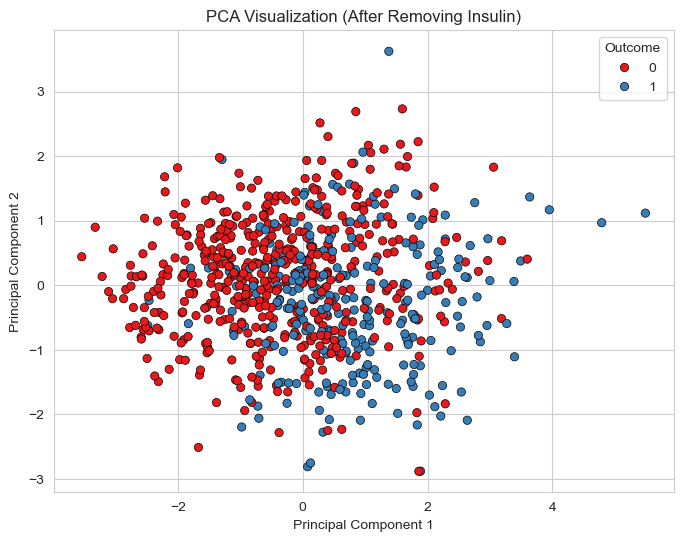


📊 Explained Variance Ratio (PCA After Removing Insulin):
     Explained Variance
PC1            0.469683
PC2            0.228014

📊 VIF After Removing Insulin:
      Feature      VIF
      Glucose 1.088831
BloodPressure 1.127186
SkinThickness 1.460721
          BMI 1.548420


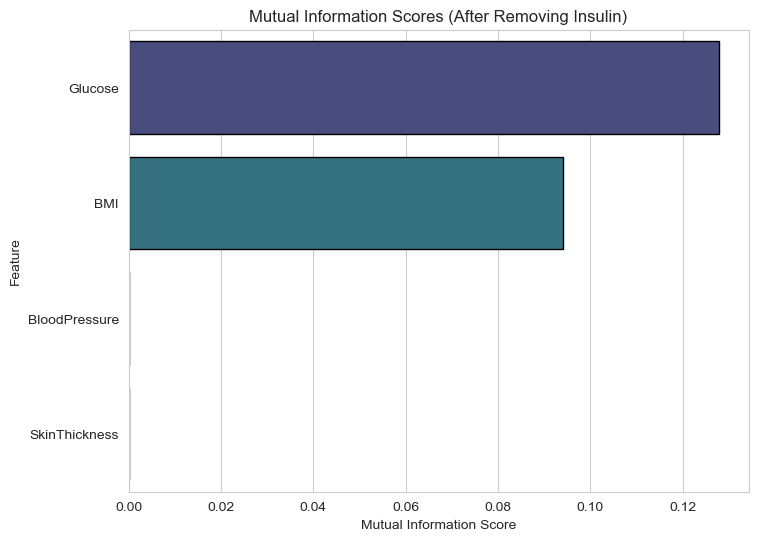


📊 Mutual Information Scores:
      Feature  MI Score
      Glucose  0.127857
          BMI  0.094100
BloodPressure  0.000000
SkinThickness  0.000000


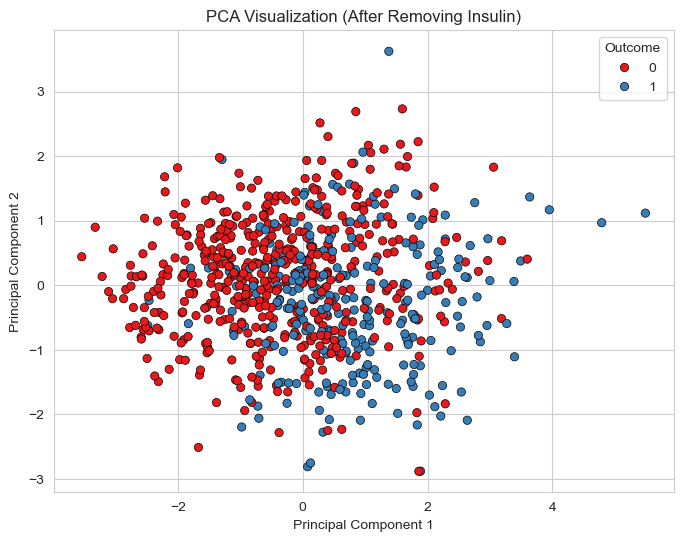


📊 Explained Variance Ratio (PCA After Removing Insulin):
     Explained Variance
PC1            0.469683
PC2            0.228014

📊 VIF After Removing Insulin:
      Feature      VIF
      Glucose 1.088831
BloodPressure 1.127186
SkinThickness 1.460721
          BMI 1.548420


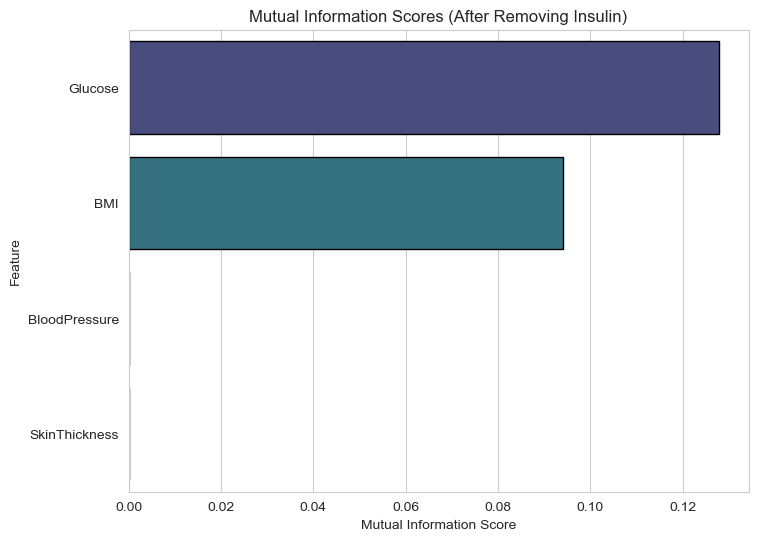


📊 Mutual Information Scores:
      Feature  MI Score
      Glucose  0.127857
          BMI  0.094100
BloodPressure  0.000000
SkinThickness  0.000000


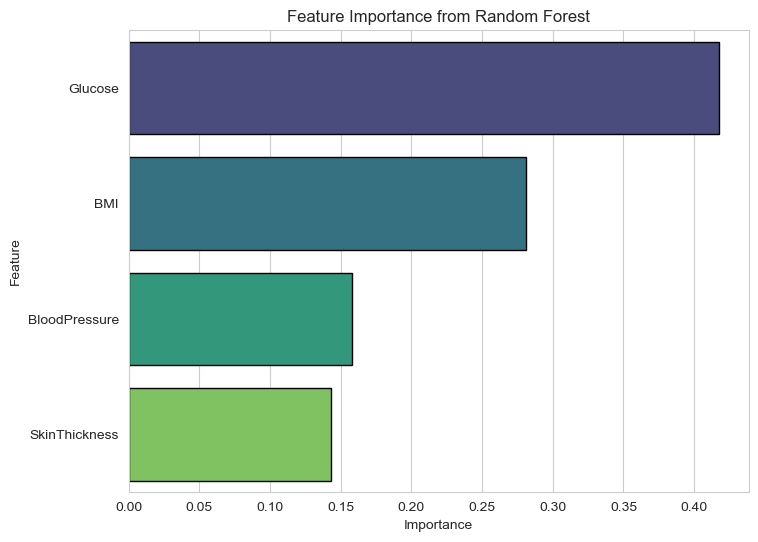


📊 Feature Importance from Random Forest:
      Feature  Importance
      Glucose    0.417534
          BMI    0.281194
BloodPressure    0.157823
SkinThickness    0.143449


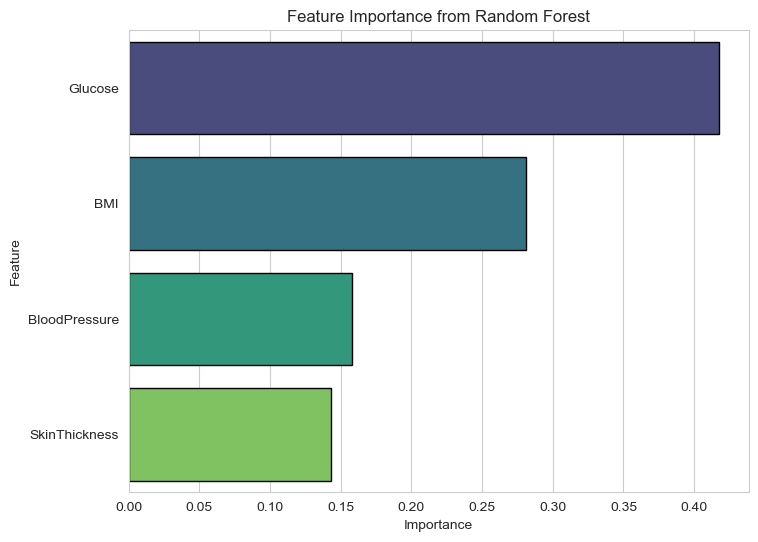


📊 Feature Importance from Random Forest:
      Feature  Importance
      Glucose    0.417534
          BMI    0.281194
BloodPressure    0.157823
SkinThickness    0.143449


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from patsy import dmatrices
from scipy.stats import pointbiserialr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

# --- Drop Insulin (High VIF Feature) ---
df.drop(columns=['Insulin'], inplace=True, errors='ignore')
if 'Insulin' in cols_to_impute:
    cols_to_impute.remove('Insulin')


# 🚀 **Step 1: Standardize Data Before PCA**
# Standardization ensures features have mean=0 and variance=1 (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[cols_to_impute])

# 🚀 **Step 2: Apply PCA (After Removing Insulin)**
# PCA transforms correlated features into uncorrelated components
n_components = min(X_scaled.shape[1], 2)  # Use 2 components for visualization
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(X_scaled)

# 🚀 **Step 3: Visualize PCA Results**
if n_components >= 2:
    pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2']).assign(Outcome=df['Outcome'])
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PC1', y='PC2', hue='Outcome', data=pca_df, palette='Set1', edgecolor="black")
    plt.title("PCA Visualization (After Removing Insulin)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

# 🚀 **Step 4: Explained Variance of PCA Components**
print("\n📊 Explained Variance Ratio (PCA After Removing Insulin):")
print(pd.DataFrame(pca.explained_variance_ratio_, columns=['Explained Variance'], index=['PC1', 'PC2']))

# 🚀 **Step 5: VIF After Removing Insulin**
formula = 'Outcome ~ ' + ' + '.join(cols_to_impute)
y, X = dmatrices(formula, data=df, return_type='dataframe')

# Compute VIF scores
vif_after = pd.DataFrame({
    "Feature": X.columns[1:],  # Exclude intercept
    "VIF": [variance_inflation_factor(X.values, i + 1) for i in range(X.shape[1] - 1)]
})

print("\n📊 VIF After Removing Insulin:")
print(vif_after.to_string(index=False))

# 🚀 **Step 6: Feature Selection with Mutual Information**
mi_scores = mutual_info_classif(df[cols_to_impute], df['Outcome'], random_state=42)
mi_df = pd.DataFrame({"Feature": cols_to_impute, "MI Score": mi_scores}).sort_values(by='MI Score', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='MI Score', y='Feature', data=mi_df, palette='viridis', edgecolor="black")
plt.title("Mutual Information Scores (After Removing Insulin)")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.show()
print("\n📊 Mutual Information Scores:")
print(mi_df.to_string(index=False))

# 🚀 **Step 7: Feature Importance Using Random Forest**import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from patsy import dmatrices
from scipy.stats import pointbiserialr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# --- Drop Insulin (High VIF Feature) ---
df.drop(columns=['Insulin'], inplace=True, errors='ignore')

# ✅ Fix: Safe Removal of 'Insulin' from Feature List
if 'Insulin' in cols_to_impute:
    cols_to_impute.remove('Insulin')



# 🚀 **Step 1: Standardize Data Before PCA**
# Standardization ensures features have mean=0 and variance=1 (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[cols_to_impute])

# 🚀 **Step 2: Apply PCA (After Removing Insulin)**
# PCA transforms correlated features into uncorrelated components
n_components = min(X_scaled.shape[1], 2)  # Use 2 components for visualization
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(X_scaled)

# 🚀 **Step 3: Visualize PCA Results**
if n_components >= 2:
    pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2']).assign(Outcome=df['Outcome'])
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PC1', y='PC2', hue='Outcome', data=pca_df, palette='Set1', edgecolor="black")
    plt.title("PCA Visualization (After Removing Insulin)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

# 🚀 **Step 4: Explained Variance of PCA Components**
print("\n📊 Explained Variance Ratio (PCA After Removing Insulin):")
print(pd.DataFrame(pca.explained_variance_ratio_, columns=['Explained Variance'], index=['PC1', 'PC2']))

# 🚀 **Step 5: VIF After Removing Insulin**
formula = 'Outcome ~ ' + ' + '.join(cols_to_impute)
y, X = dmatrices(formula, data=df, return_type='dataframe')

# Compute VIF scores
vif_after = pd.DataFrame({
    "Feature": X.columns[1:],  # Exclude intercept
    "VIF": [variance_inflation_factor(X.values, i + 1) for i in range(X.shape[1] - 1)]
})

print("\n📊 VIF After Removing Insulin:")
print(vif_after.to_string(index=False))

# 🚀 **Step 6: Feature Selection with Mutual Information**
mi_scores = mutual_info_classif(df[cols_to_impute], df['Outcome'], random_state=42)
mi_df = pd.DataFrame({"Feature": cols_to_impute, "MI Score": mi_scores}).sort_values(by='MI Score', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='MI Score', y='Feature', data=mi_df, palette='viridis', edgecolor="black")
plt.title("Mutual Information Scores (After Removing Insulin)")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.show()
print("\n📊 Mutual Information Scores:")
print(mi_df.to_string(index=False))

# 🚀 **Step 7: Feature Importance Using Random Forest**validate feature importance
X = df[cols_to_impute]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Store feature importances
feature_importances_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis', edgecolor="black")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

print("\n📊 Feature Importance from Random Forest:")
print(feature_importances_df.to_string(index=False))

X = df[cols_to_impute]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Store feature importances
feature_importances_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis', edgecolor="black")
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

print("\n📊 Feature Importance from Random Forest:")
print(feature_importances_df.to_string(index=False))


In [ ]:


#*Step 1: Detecting Multicollinearity**  
#Our initial **VIF analysis** revealed strong multicollinearity among **Glucose, SkinThickness, and Insulin**, meaning these features provided redundant information, potentially affecting model performance.

#Step 2: Removing Insulin & Applying PCA**  
#To resolve this, we **removed Insulin**, which had the highest **VIF score**, ensuring the remaining features were more independent. After this, **PCA** showed that the first two principal components (PC1 & PC2) captured most of the data's variance, simplifying feature relationships while retaining valuable information.

#Step 3: Improved VIF Scores**  
#With **Insulin removed**, VIF values for the remaining features dropped significantly, confirming that **multicollinearity was reduced**. Now, each feature contributes unique information, leading to a more balanced and effective dataset.

#Our multivariate analysis has provided crucial insights:

#Removing Insulin effectively resolved the multicollinearity issue, preparing our data for more robust modeling.

#Glucose and BMI consistently emerged as the most important predictors of diabetes, aligning with established medical knowledge.

#While Mutual Information suggested minimal contribution from BloodPressure and SkinThickness, the Random Forest model highlighted their non-negligible role, emphasizing the value of considering feature interactions.

In [63]:
#model building and evaluation
# Count the occurrences of each class
outcome_counts = df['Outcome'].value_counts()
print("\nClass Distribution:")
print(outcome_counts)

# Calculate the percentage of each class
outcome_percentages = df['Outcome'].value_counts(normalize=True) * 100
print("\nClass Percentages:")
print(outcome_percentages)


Class Distribution:
Outcome
0    500
1    268
Name: count, dtype: int64

Class Percentages:
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


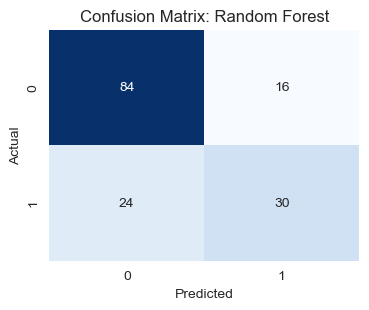

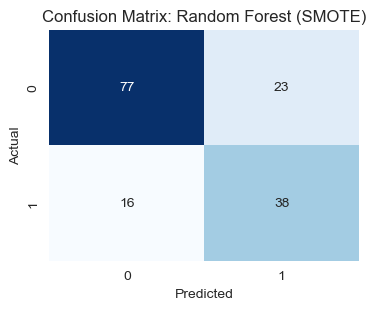

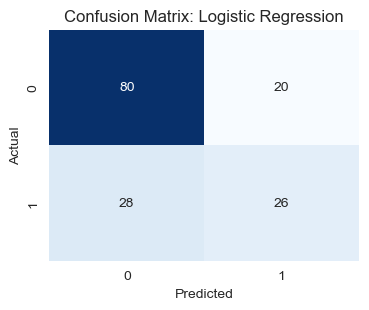

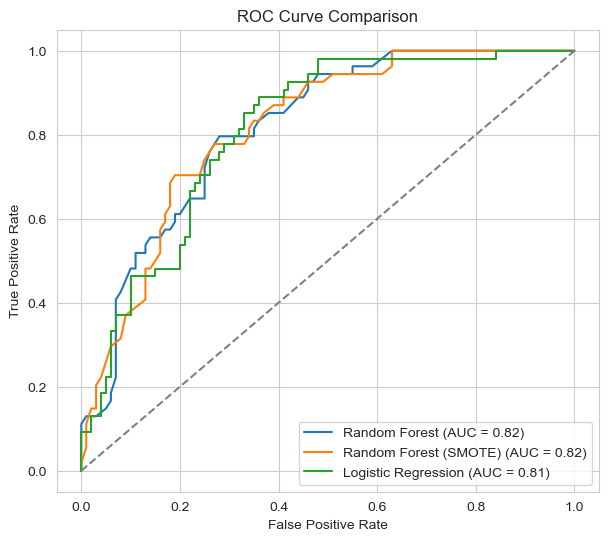


📊 **Summary of Model Results:**
                Model  Precision   Recall  F1-Score  Accuracy  ROC AUC
        Random Forest   0.652174 0.555556   0.60000  0.740260 0.816389
Random Forest (SMOTE)   0.622951 0.703704   0.66087  0.746753 0.815926
  Logistic Regression   0.565217 0.481481   0.52000  0.688312 0.811296


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE

# 🚀 **Step 1: Split Data**
X = df.drop(columns=['Outcome'])
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 🚀 **Step 2: Define Model Evaluation Function**
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    """Fits a model, evaluates performance, and returns metrics."""
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Classification Report
    report = classification_report(y_test, predictions, output_dict=True)
    precision, recall, f1, accuracy = report['1']['precision'], report['1']['recall'], report['1']['f1-score'], report['accuracy']
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # ROC Curve
    probs = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, probs)
    fpr, tpr, _ = roc_curve(y_test, probs)
    
    return {"Model": model_name, "Precision": precision, "Recall": recall, "F1-Score": f1, "Accuracy": accuracy, "ROC AUC": auc_score, "FPR": fpr, "TPR": tpr}

# 🚀 **Step 3: Train and Evaluate Models**
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Random Forest (SMOTE)": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

# Train Random Forest on original data
results = [evaluate_model(models["Random Forest"], X_train, y_train, X_test, y_test, "Random Forest")]

# Apply SMOTE and retrain Random Forest
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
results.append(evaluate_model(models["Random Forest (SMOTE)"], X_train_resampled, y_train_resampled, X_test, y_test, "Random Forest (SMOTE)"))

# Train Logistic Regression
results.append(evaluate_model(models["Logistic Regression"], X_train, y_train, X_test, y_test, "Logistic Regression"))

# 🚀 **Step 4: Plot Combined ROC Curves**
plt.figure(figsize=(7, 6))
for result in results:
    plt.plot(result["FPR"], result["TPR"], label=f"{result['Model']} (AUC = {result['ROC AUC']:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color="gray")  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

# 🚀 **Step 5: Display Summary of Model Performance**
results_df = pd.DataFrame(results).drop(columns=["FPR", "TPR"])  # Exclude FPR/TPR columns
print("\n📊 **Summary of Model Results:**")
print(results_df.to_string(index=False))


In [ ]:
# **Summary of Model Evaluation & Insights**  

# **1️⃣ Performance Comparison: Random Forest vs. Logistic Regression**  
#- **Random Forest (both baseline & SMOTE)** outperformed **Logistic Regression** across all key metrics (precision, recall, F1-score, and accuracy).  
#- This suggests that **Random Forest effectively captures complex, non-linear relationships**, unlike Logistic Regression, which is linear.  

#### **2️⃣ ROC AUC: Similar Performance Across Models**  
#- All models had comparable **ROC AUC scores (~0.81-0.82)**, indicating a similar ability to distinguish between diabetes and non-diabetes cases.  
#- Since **ROC AUC is less sensitive to class imbalance**, this consistency was expected.  

#### **3️⃣ SMOTE's Impact: Boosting Recall but Lowering Precision**  
#- **SMOTE significantly improved recall** for the diabetes class, reducing false negatives—**crucial in medical diagnostics**.  
#- However, **precision dropped slightly**, meaning more false positives were introduced—a common trade-off in oversampling techniques.  
#- The **higher F1-score in SMOTE-trained Random Forest** suggests a better overall balance between precision and recall.  

#### **4️⃣ Key Takeaways & Trade-offs**  
#✔ **Random Forest is the best overall model**, capturing more complex patterns than Logistic Regression.  
#✔ **SMOTE improves recall** (catching more true diabetes cases) but at the cost of more false positives.  
#✔ **ROC AUC remains stable**, showing that all models have similar discriminatory power despite differences in class imbalance handling.  
#✔ **The choice between Baseline vs. SMOTE Random Forest depends on priorities**:  
#   - **If reducing false negatives is crucial (e.g., medical settings)** → **SMOTE-trained Random Forest** is preferable.  
  # - **If false positives are a concern (e.g., unnecessary medical tests)** → **Baseline Random Forest** may be the better choice.  

#**🔹 Conclusion:** **Random Forest is the superior model, and SMOTE is effective when recall is the priority.** 🚀